In [113]:
# Imports
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math

# Take home exam Question 1 

First convert the data from the text file of nucleobases to a realvalued matrix (PCA needs a real-valued matrix). Specifically, convert the
genetic data into a binary matrix X such that Xi,j = 0 if the i
th individual has
column j’s mode nucleobase1
for their j
th nucleobase, and Xi,j = 1 otherwise.
Note that all mutations appear as a 1, even if they are different mutations,
so if the mode for column j is “G”, then if individual i has an “A”,“T”, or
“C”, then Xi,j would be 1

In [58]:
genomes_df = pd.read_csv("q1_dataset/p4dataset2023.txt")
genomes_matrix_full = np.loadtxt("q1_dataset/p4dataset2023.txt",dtype=str)
genomes_matrix = genomes_matrix_full[:, 3:]


In [59]:
transposed_genome_matrix = zip(*genomes_matrix)
most_common_genome = [Counter(column).most_common(1)[0][0] for column in transposed_genome_matrix]
binary_matrix_list = []
for row in genomes_matrix:
    binary_matrix_list.append([0 if curr==mode else 1 for curr,mode in zip(row, most_common_genome)])


In [60]:
binary_matrix = np.array(binary_matrix_list)
binary_matrix.shape

(995, 10101)

### p1
 Say we ran PCA on the binary matrix X above. What would be the dimension of the returned vectors?

In [52]:
pca = PCA()
X_PCA = pca.fit_transform(binary_matrix)
X_PCA.shape


(995, 995)

### p2
 We will examine the first 2 principal components of X. These components contain lots of information about our data set. Create a scatter plot with each of the 995 rows of X projected onto the first two principal components. In other words, the horizontal axis should be v1, the vertical axis v2, and each individual should be projected onto the subspace spanned by v1 and v2. Your plot must use a different color for each population and include a legend.

In [62]:
population_name_dict = {
    "ACB": "African-Caribbean",
    "GWD": "Gambian",
    "ESN": "Esan",
    "MSL": "Mende",
    "YRI": "Yoruba",
    "LWK": "Luhya",
    "ASW": "African-American"
}
population_dict = {
    "ACB": [],
    "GWD": [],
    "ESN": [],
    "MSL": [],
    "YRI": [],
    "LWK": [],
    "ASW": []
}

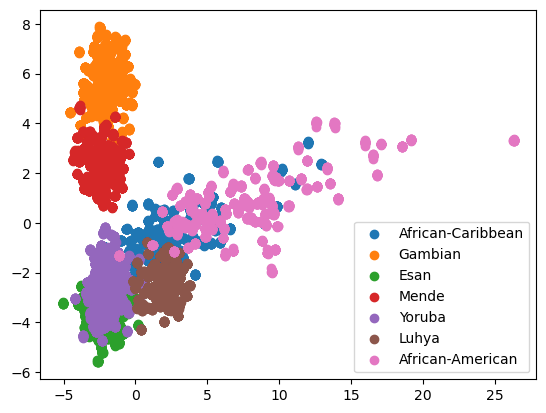

In [82]:
pca = PCA(n_components=2)
X_PCA_2 = pca.fit_transform(binary_matrix)


for i in range(len(genomes_matrix_full)):
    population_dict[genomes_matrix_full[i][2]].append(X_PCA_2[i])

for key, value in population_dict.items():
    value = np.array(value)
    plt.scatter(value[:,0],value[:,1], label=population_name_dict[key])
plt.legend()
plt.show()


### p3 
In two sentences, list 1 or 2 basic facts about the plot created in part (b). Can you interpret the first two principal components? What aspects of the data do the first two principal components capture? Hint: think about history and geography.

### Answer

We notice that Gambian and Mende are close together which make sense since geographically they are close together. The other thing one might note is that African-Caribbean and African-American are close together in its cluster but have a higher variance than the others in its cluster. Both follow the same variance pattern which could be due to having shared history.

### p4

We will now examine the third principal component of X.
Create another scatter plot with each individual projected onto the
subspace spanned by the first and third principal components. After
plotting, play with different labeling schemes (with labels derived from
the meta-data) to explain the clusters that you see. Your plot must
include a legend.

In [94]:
population_dict_n3 = {
    "ACB": [],
    "GWD": [],
    "ESN": [],
    "MSL": [],
    "YRI": [],
    "LWK": [],
    "ASW": []
}
sex_dict_n3 = {
    "F":[],
    "M":[]
}
sex_dict = {
    "F":"female",
    "M":"male"
}


F
M


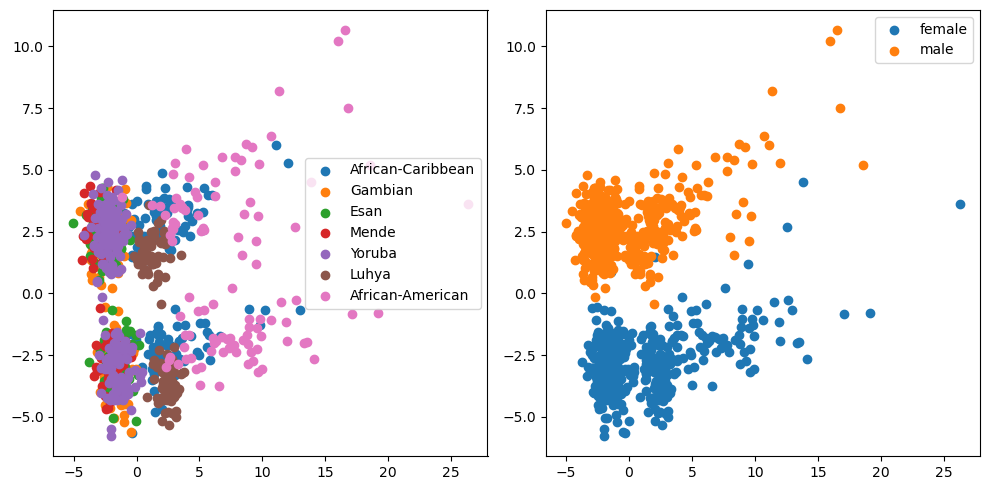

In [95]:
pca = PCA(n_components=3)
X_PCA_3 = pca.fit_transform(binary_matrix)


for i in range(len(genomes_matrix_full)):
    population_dict_n3[genomes_matrix_full[i][2]].append(X_PCA_3[i])
    sex_dict_n3[genomes_matrix_full[i][1]].append(X_PCA_3[i])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))


for key, value in population_dict_n3.items():
    value = np.array(value)
    axs[0].scatter(value[:,0],value[:,2], label=population_name_dict[key])

for key, value in sex_dict_n3.items():
    print(key)
    value = np.array(value)
    axs[1].scatter(value[:,0],value[:,2], label=sex_dict[key])

axs[0].legend()
axs[1].legend()

plt.tight_layout()
plt.legend()
plt.show()


### p5
Something should have popped out at you in the plot above.
In one sentence, what information does the third principal component
capture?


## Answer

It seems that using the third principal component will give features related to sex/gender. It shows clearly in the second plot that there is a clear slice in the vertical space for sex which is the third PCA. Judging by the first image it seems to not be related to geograpical origin. 

### p6 
In this part, you will inspect the third principal component.
Plot the nucleobase index vs the absolute value of the corresponding
value of the third principal component in that index. (The x-axis of
your plot should go from 1 to 10101—you’re literally just plotting the
10101 values in the third principal component.) What do you notice?
What’s a possible explanation? Hint: think about chromosomes (and
if you don’t know much biology, feel free to look through the wikipedia
page on chromosomes....)


In [155]:
pca = PCA(n_components=3)
X_PCA_6 = pca.fit_transform(binary_matrix.T)

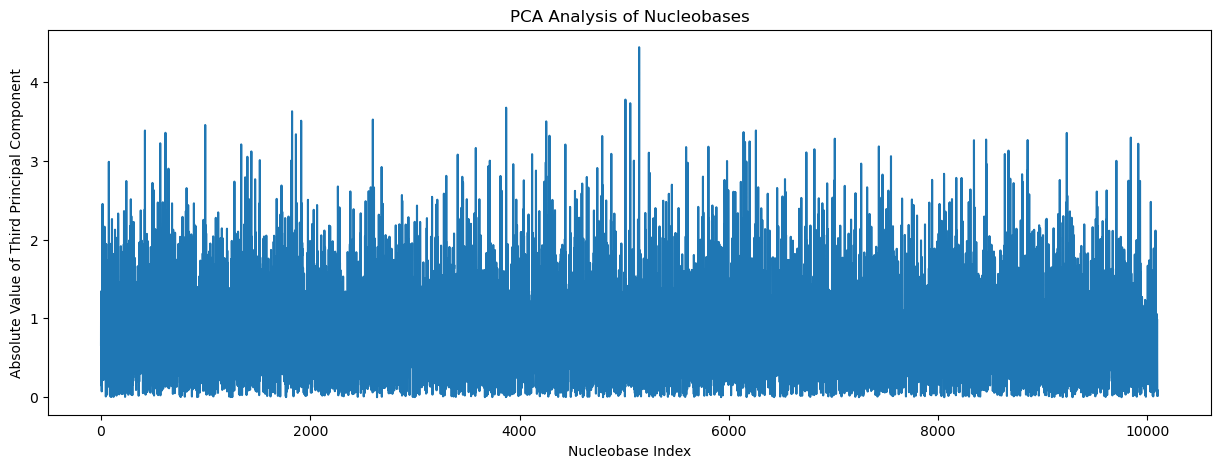

In [156]:
ys = [ abs(x) for x in X_PCA_6[:,2]]
fig, axs = plt.subplots(1,  figsize=(15, 5))
axs.plot(ys)
axs.set_xlabel('Nucleobase Index')
axs.set_ylabel('Absolute Value of Third Principal Component')
axs.set_title('PCA Analysis of Nucleobases')
plt.show()